In [ ]:
# import libraries
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

import random

In [ ]:
def generate_no():
  a = random.uniform(-10,+10)
  b = random.uniform(-10,+10)
  c = round(a+b)

  return [a,b,c]

train_set = [generate_no() for x in range(12000)]
test_set =  [generate_no() for x in range(1500)]
train_set = np.array(train_set)
test_set = np.array(test_set)

In [ ]:
train_features = train_set[:,:2]
train_labels= train_set[:,2]

train_labels = train_labels[:,None]

test_features = test_set[:,:2]
test_labels = test_set[:,2]

test_labels = test_labels[:,None]

X1 = torch.tensor(train_features).float()
X2 = torch.tensor(train_labels).float()


Train_Dataset = TensorDataset(X1,X2)
Test_Dataset =  TensorDataset(torch.tensor(test_features).float(),torch.tensor(test_labels).float())

Train_Loader = DataLoader(Train_Dataset,batch_size=Train_Dataset.tensors[0].shape[0])
Test_Loader =  DataLoader(Test_Dataset,batch_size=Test_Dataset.tensors[0].shape[0])

In [ ]:
X1.dtype


torch.float32

In [ ]:
class Machine(nn.Module):
  def __init__(self):
    super().__init__()

    self.input = nn.Linear(2,8)

    self.hidden1 = nn.Linear(8,16)

    self.hidden2 = nn.Linear(16,8)

    self.output = nn.Linear(8,1)

  def forward(self,x):

    x = F.relu(self.input(x))
    x = F.relu(self.hidden1(x))
    x = F.relu(self.hidden2(x))

    return self.output(x)


  

In [ ]:
model = Machine()

loss = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

train_loss = []
test_loss = []

for epoch in range(200):


  for X,y in Train_Loader:

    yHat = model(X)
    lossfn = loss(yHat,y)

    optimizer.zero_grad()
    lossfn.backward()
    optimizer.step()

    train_loss.append(lossfn.item())

    with torch.no_grad():
      X,y = next(iter(Test_Loader))
      yHat = model(X)

      lossfn = loss(yHat,y)

      test_loss.append(lossfn.item())
    
    if(epoch%50==0):
      print("Epoch Done",epoch)

Epoch Done 0
Epoch Done 50
Epoch Done 100
Epoch Done 150


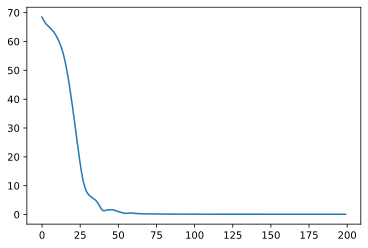

In [ ]:
pd.Series(train_loss).plot()

In [ ]:
X.shape

torch.Size([1500, 2])

In [ ]:
X[0]

tensor([-1.6580, -5.1187])

In [ ]:
model(torch.Tensor([5,7]))

tensor([11.9936], grad_fn=<AddBackward0>)

In [ ]:
torch.save(model.state_dict(),'Computing1.pt')